#  Fashion MNIST Neural Networks and Deep Learning

## 1.0 Study purpose

Mine fashion data using deep neural networks for deep learning, illustrate how deep learning is the appropriate technique for the application, and make recommendations regarding the selection of parameters for neural networks.

## 2.0 Data Understanding

### 2.1 Prelimary data analysis

#### 2.1.1 Import libraries

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
import tensorflow as tf

%matplotlib inline

In [51]:
from matplotlib import pyplot
from keras.datasets import mnist, fashion_mnist, cifar100
from keras.models import Sequential
from keras.utils import to_categorical, plot_model
from keras.layers import Dense , Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.constraints import max_norm
from keras.optimizers import Adam ,RMSprop
from keras import backend as K
from subprocess import check_output

#### 2.1.2 Suppress warnings

In [52]:
warnings.filterwarnings('ignore')

#### 2.1.3 Data ingestion

In [53]:
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

In [54]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


#### 2.1.4 Set random seed

In [55]:
np.random.seed(42)

#### 2.1.5 Connect graphics visualization

In [56]:
# os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"

### 2.2 Data quality

#### 2.2.1 Training data sample images

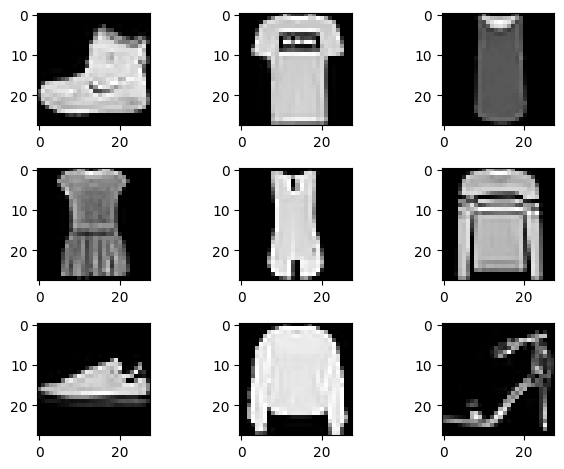

In [57]:
for i in range(9):
    pyplot.subplot(3, 3, i + 1)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))

pyplot.tight_layout()
pyplot.show()

#### 2.2.2 Training label data counts

In [58]:
unique, counts = np.unique(train_y, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

Train labels:  {np.uint8(0): np.int64(6000), np.uint8(1): np.int64(6000), np.uint8(2): np.int64(6000), np.uint8(3): np.int64(6000), np.uint8(4): np.int64(6000), np.uint8(5): np.int64(6000), np.uint8(6): np.int64(6000), np.uint8(7): np.int64(6000), np.uint8(8): np.int64(6000), np.uint8(9): np.int64(6000)}


#### 2.2.3 Testing label data counts

In [59]:
unique, counts = np.unique(test_y, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))


Test labels:  {np.uint8(0): np.int64(1000), np.uint8(1): np.int64(1000), np.uint8(2): np.int64(1000), np.uint8(3): np.int64(1000), np.uint8(4): np.int64(1000), np.uint8(5): np.int64(1000), np.uint8(6): np.int64(1000), np.uint8(7): np.int64(1000), np.uint8(8): np.int64(1000), np.uint8(9): np.int64(1000)}


#### 2.2.4 Label descriptions

1.	T-shirt/top
2.	Trouser
3.	Pullover
4.	Dress
5.	Coat
6.	Sandal
7.	Shirt
8.	Sneaker
9.	Bag
10.	Ankle boot

### 2.3 Exploratory data analysis

## 3.0 Data preprocessing

### 3.1 Compute the number of labels

In [60]:
num_labels = len(np.unique(train_y))
num_labels

10

### 3.2 Encode output data

In [61]:
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

### 3.3 Image dimensions

In [62]:
image_size = train_X.shape[1]
input_size = image_size * image_size
input_size

784

In [63]:
train_X = np.expand_dims(train_X, axis=-1)

### 3.4 Number of classes

In [64]:
num_classes = test_y.shape[1]

### 3.5 Resize and normalize data

#### 3.5.1 Training data

In [65]:
train_X1 = np.reshape(train_X, [-1, input_size])
train_X1 = train_X1.astype('float32') / 255
train_X = train_X.astype('float32') / 255

In [66]:
print('X1_train: ' + str(train_X1.shape))
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))

X1_train: (60000, 784)
X_train: (60000, 28, 28, 1)
Y_train: (60000, 10)


#### 3.5.2 Testing data

In [67]:
test_X1 = np.reshape(test_X, [-1, input_size])
test_X1 = test_X1.astype('float32') / 255
test_X = test_X.astype('float32') / 255

In [68]:
print('X1_test:  '  + str(test_X1.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X1_test:  (10000, 784)
X_test:  (10000, 28, 28)
Y_test:  (10000, 10)


### 4.0 Modeling

### 4.1 Batch size for neural network model

In [69]:
batch_size = 128
input_dim = 784
epochs = 20

### 4.2 Configure the neural network model

In [70]:
def build_mlp(input_dim, num_classes, dropout_rates=[0.5, 0.3, 0.2]):
    model = Sequential()
    model.add(Dense(512, input_shape=(input_dim,), activation='relu', kernel_constraint=max_norm(3)))
    model.add(Dropout(dropout_rates[0]))
    model.add(Dense(256, activation='relu', kernel_constraint=max_norm(3)))
    model.add(Dropout(dropout_rates[1]))
    model.add(Dense(128, activation='relu', kernel_constraint=max_norm(3)))
    model.add(Dropout(dropout_rates[2]))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [71]:
model = build_mlp(input_dim=input_dim, num_classes=num_classes)

In [73]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

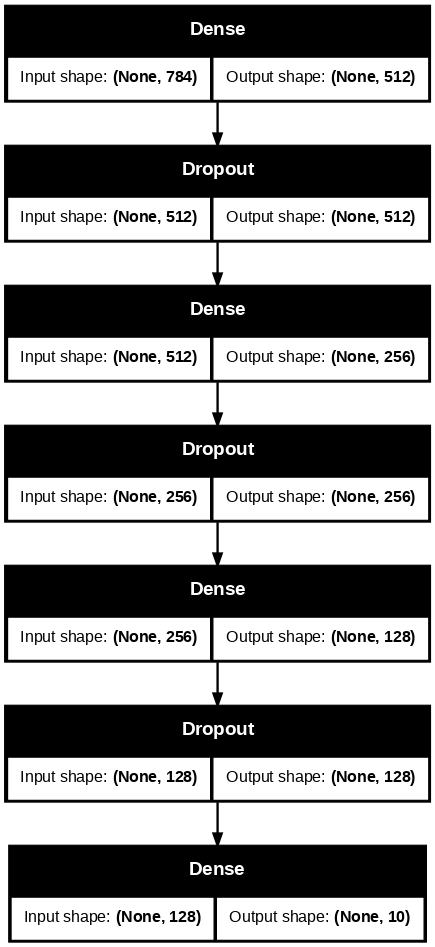

In [74]:
plot_model(model, to_file='mlp-fashion-mnist-deep.png', show_shapes=True, dpi=84)

### 4.3 Compile the neural network model

In [75]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### 4.4 Fit the neural network model

In [76]:
history = model.fit(train_X1, train_y, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.6499 - loss: 0.9554 - val_accuracy: 0.8317 - val_loss: 0.4558
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8195 - loss: 0.5045 - val_accuracy: 0.8545 - val_loss: 0.4054
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8365 - loss: 0.4559 - val_accuracy: 0.8585 - val_loss: 0.3829
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8472 - loss: 0.4195 - val_accuracy: 0.8652 - val_loss: 0.3656
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8544 - loss: 0.3991 - val_accuracy: 0.8737 - val_loss: 0.3562
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8597 - loss: 0.3815 - val_accuracy: 0.8740 - val_loss: 0.3454
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8590 - loss: 0.3802 - val_accuracy: 0.8755 - val_loss: 0.3342
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8652 - loss: 0.3637 - val_

## 5.0 Evaluation

In [77]:
loss, acc = model.evaluate(test_X1, test_y, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8831 - loss: 0.3268

Test accuracy: 88.2%


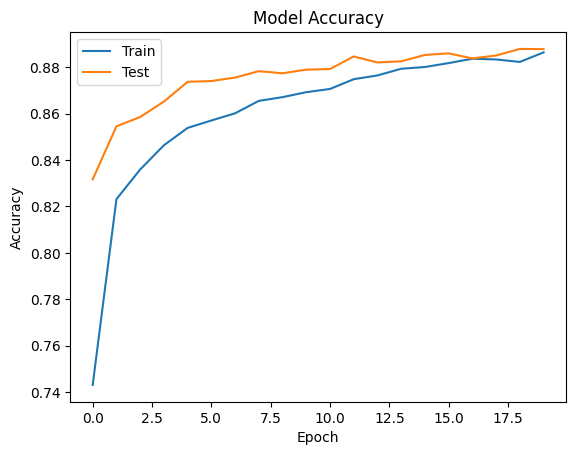

In [78]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

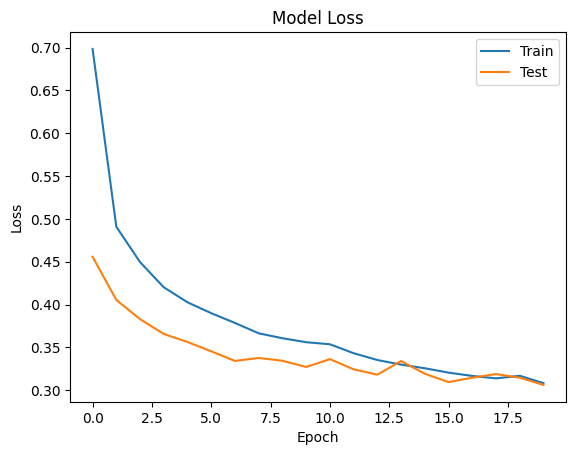

In [79]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='upper right')
plt.show()

## 6.0 Deployment